<a href="https://colab.research.google.com/github/E1250/cnn_cv_gans-ref/blob/main/FashionGANs_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Generative Adversarial Neural Network(GANs) using TensorFlow and Python
- Nicholas Renotte Youtube Video - https://www.youtube.com/watch?v=AALBGpLbj6Q
- Github Code - https://github.com/nicknochnack/GANBasics

In [1]:
# Installing Dependencies

# * Tensorflow
# * Tensorflow Datasets

In [2]:
# Bringing in TF
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu ,True)
  
print(f"You have {len(gpus)} GPUs")

You have 1 GPUs


In [3]:
# Bringing in TF datasets for fashion mnist
import tensorflow_datasets as tfds
# plt for viz stuff
import matplotlib.pyplot as plt

In [4]:
# Loading Datasets usign tensorflow dataset api
df = tfds.load("fashion_mnist", split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVEXQWR/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVEXQWR/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
df.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## Visualize your data

In [6]:
import numpy as np

In [7]:
# Setup connection aka iterator
dataiterator = df.as_numpy_iterator()

# Getting the data out of the pipeline
# when you call .next() to the iterator, it generates new image every time. it save memory
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

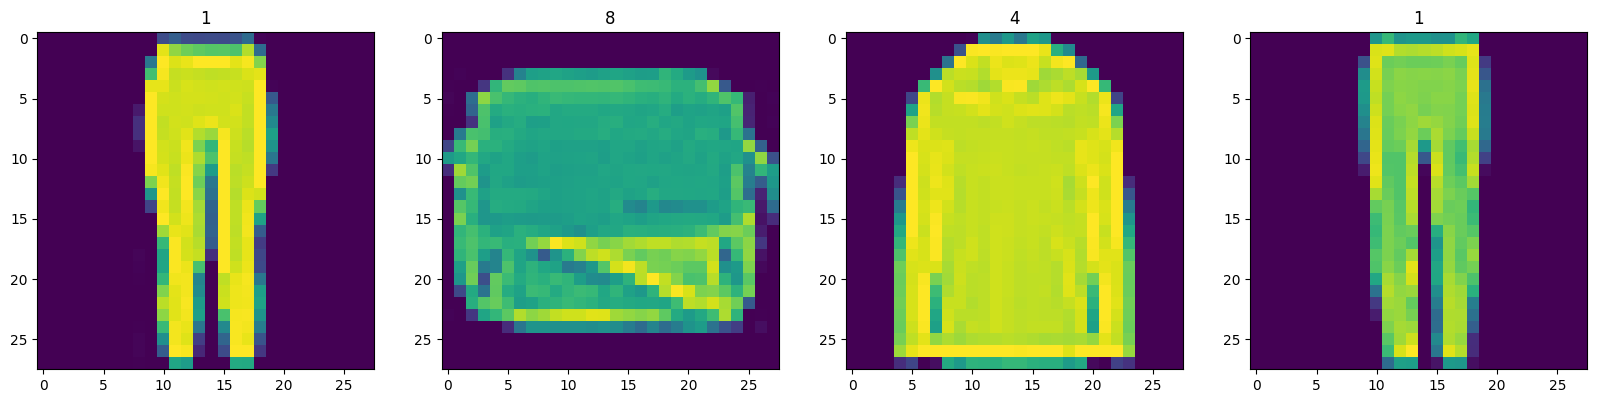

In [8]:
# Plotting the images
fig,ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx in range(4):
  # Grapping the image
  sample = dataiterator.next()
  # Plotting the image
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [9]:
# Scale and return images only
def scale_images(data):
  """
  Scale your images - devide by 255
  Inputs : image batch (image , label)
  Returns : Images only
  """
  image = data['image']
  return image / 255

In [10]:
# Building a data Pipeline
# Map - Cache - Shuffle - Batch - Prefetch
# ds = tfds.load('fashion_mnist' , split = 'train') - Already installed
ds = df
# Running scale_images preprocessing step
ds = ds.map(scale_images)
# Caching the data set for that batch
ds = ds.cache()
ds = ds.shuffle(60000)
# Batch into 128
ds = ds.batch(128)
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape # Batches , 28 , 28 , Dimensions

(128, 28, 28, 1)

## Building the Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

### Generator
 **UpSampling Layer** is a type of neural network layer that is used to increase the size of an input feature map. This is done by repeating the values in the feature map multiple times. **Upsampling layers** are often used in generative adversarial networks (GANs) to create high-resolution images from low-resolution images.

In [13]:
def build_generator():
  model = Sequential()

  # Takes random values then reshapes it to 7x7x128
  model.add(Dense(7*7*128 , input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # UpSampling Block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  # UpSampling Block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Conv Block 1
  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Conv Block 2
  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get one channel
  model.add(Conv2D(1,4,padding = 'same' , activation = 'sigmoid'))

  return model

In [14]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 7s 7s/step


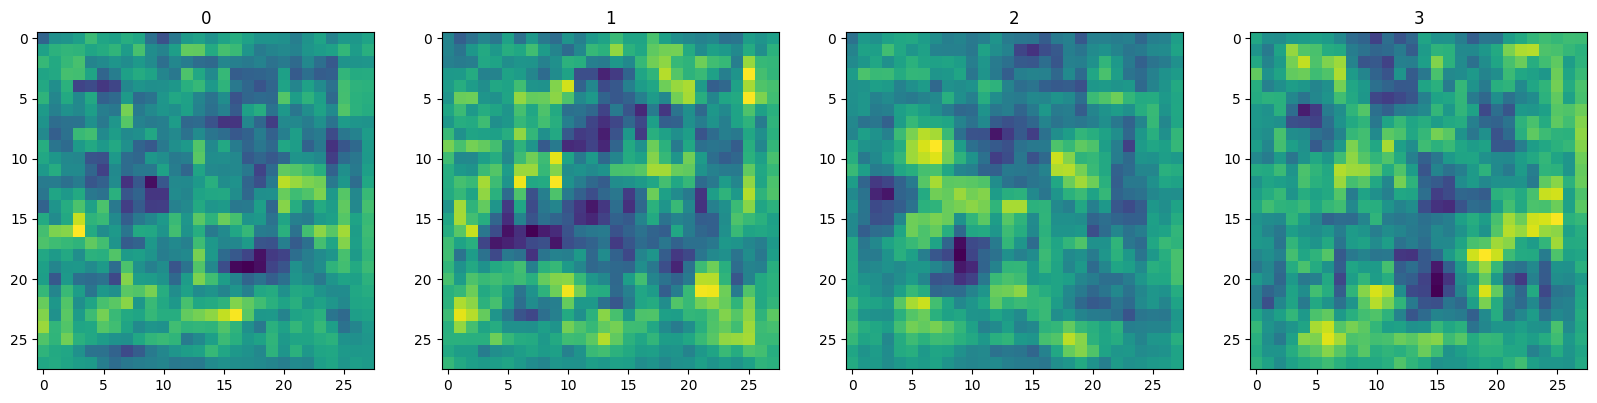

In [15]:
# Testing the generator and generate test image
test_image = generator.predict(np.random.randn(4,128,1))

# Plotting the images
fig,ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx,img in enumerate(test_image):
  # Plotting the image
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

### Discriminator

In [16]:
def bulid_discriminator():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1 , activation = 'sigmoid'))


  return model

In [17]:
discriminator = bulid_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [18]:
test_image = generator.predict(np.random.randn(4,128,1))

discriminator.predict(test_image)

1/1 [==============================] - 0s 193ms/step


array([[0.4974716 ],
       [0.49729595],
       [0.49733782],
       [0.49724755]], dtype=float32)

## Creating Training Loop

In [19]:
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.losses import BinaryCrossentropy # Loss

In [20]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [21]:
# Importing base model class to subclass it
from tensorflow.keras.models import Model

In [22]:
class FashionGAN(Model):
  def __init__(self , generator , discriminator , *args , **kwargs):
    super().__init__(*args , **kwargs)
    
    # Create attr for Gen and Disc
    self.generator = generator
    self.discriminator = discriminator


  def compile(self , g_opt , d_opt , g_loss , d_loss , *args , **kwargs):
    # Compile with base class
    super().compile(*args , **kwargs)

    # Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss


  def train_step(self,batch):
    # Data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)) , training = False)

    # Train the Discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discriminator
      yhat_real = self.discriminator(real_images , training = True)
      yhat_fake = self.discriminator(fake_images , training = True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake] ,axis = 0)

      # Create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real) , tf.ones_like(yhat_fake)] , axis = 0)

      # Add some noise to the output
      noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))

      y_realfake += tf.concat([noise_real , noise_fake] , axis = 0)

      # Calculate the Loss - Binary Crosse
      total_d_loss = self.d_loss(y_realfake , yhat_realfake)

    # Apply backpropagation
    dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad ,  self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:

      # Generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training = True)

      # Create the predicted labels
      predicted_labels = self.discriminator(gen_images , training = False)

      # Calculate the loss - trick to training to fake out the discriminator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels) , predicted_labels)


    # Apply Backprop
    ggrad = g_tape.gradient(total_g_loss , self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad , self.generator.trainable_variables))

    return {'d_loss':total_d_loss , 'g_loss':total_g_loss}

# @tf.function
# def train_step():
#   pass

In [23]:
# Creating instance
fashgan = FashionGAN(generator,discriminator)

In [24]:
# Compile the model
fashgan.compile(g_opt, d_opt , g_loss , d_loss)

In [25]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [28]:
class ModelMonitor(Callback):
  def __init__(self,num_img = 3 ,latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch , logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img , self.latent_dim , 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('/content/GAN_Images' , f'generated_img_{epoch}_{i}.png'))

In [29]:
# Training 
# Recommend 2000 epochs
hist =fashgan.fit(ds,epochs = 5,callbacks = [ModelMonitor()])

Epoch 1/5
  6/469 [..............................] - ETA: 1:21 - d_loss: 0.5898 - g_loss: 1.3149

469/469 [==============================] - 85s 182ms/step - d_loss: 0.6702 - g_loss: 0.9993
Epoch 2/5
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6939 - g_loss: 0.6717
Epoch 3/5
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6816 - g_loss: 0.6615
Epoch 4/5
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6967 - g_loss: 0.6215
Epoch 5/5
469/469 [==============================] - 84s 179ms/step - d_loss: 0.6943 - g_loss: 0.6458


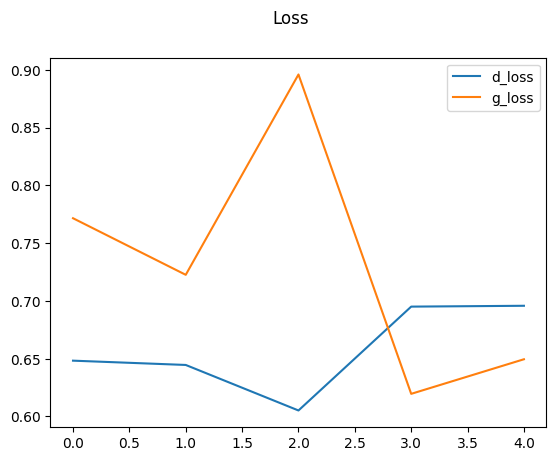

In [31]:
# Plotting History

plt.suptitle('Loss')
plt.plot(hist.history['d_loss'] , label = 'd_loss')
plt.plot(hist.history['g_loss'] , label = 'g_loss')
plt.legend()
plt.show()

## Test Out the Generator

In [34]:
# If you wanna load weights and not using the trained weights you can use 
# generator.load_weights(" `Path here` ")

# Generating images using the model you created
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 347ms/step


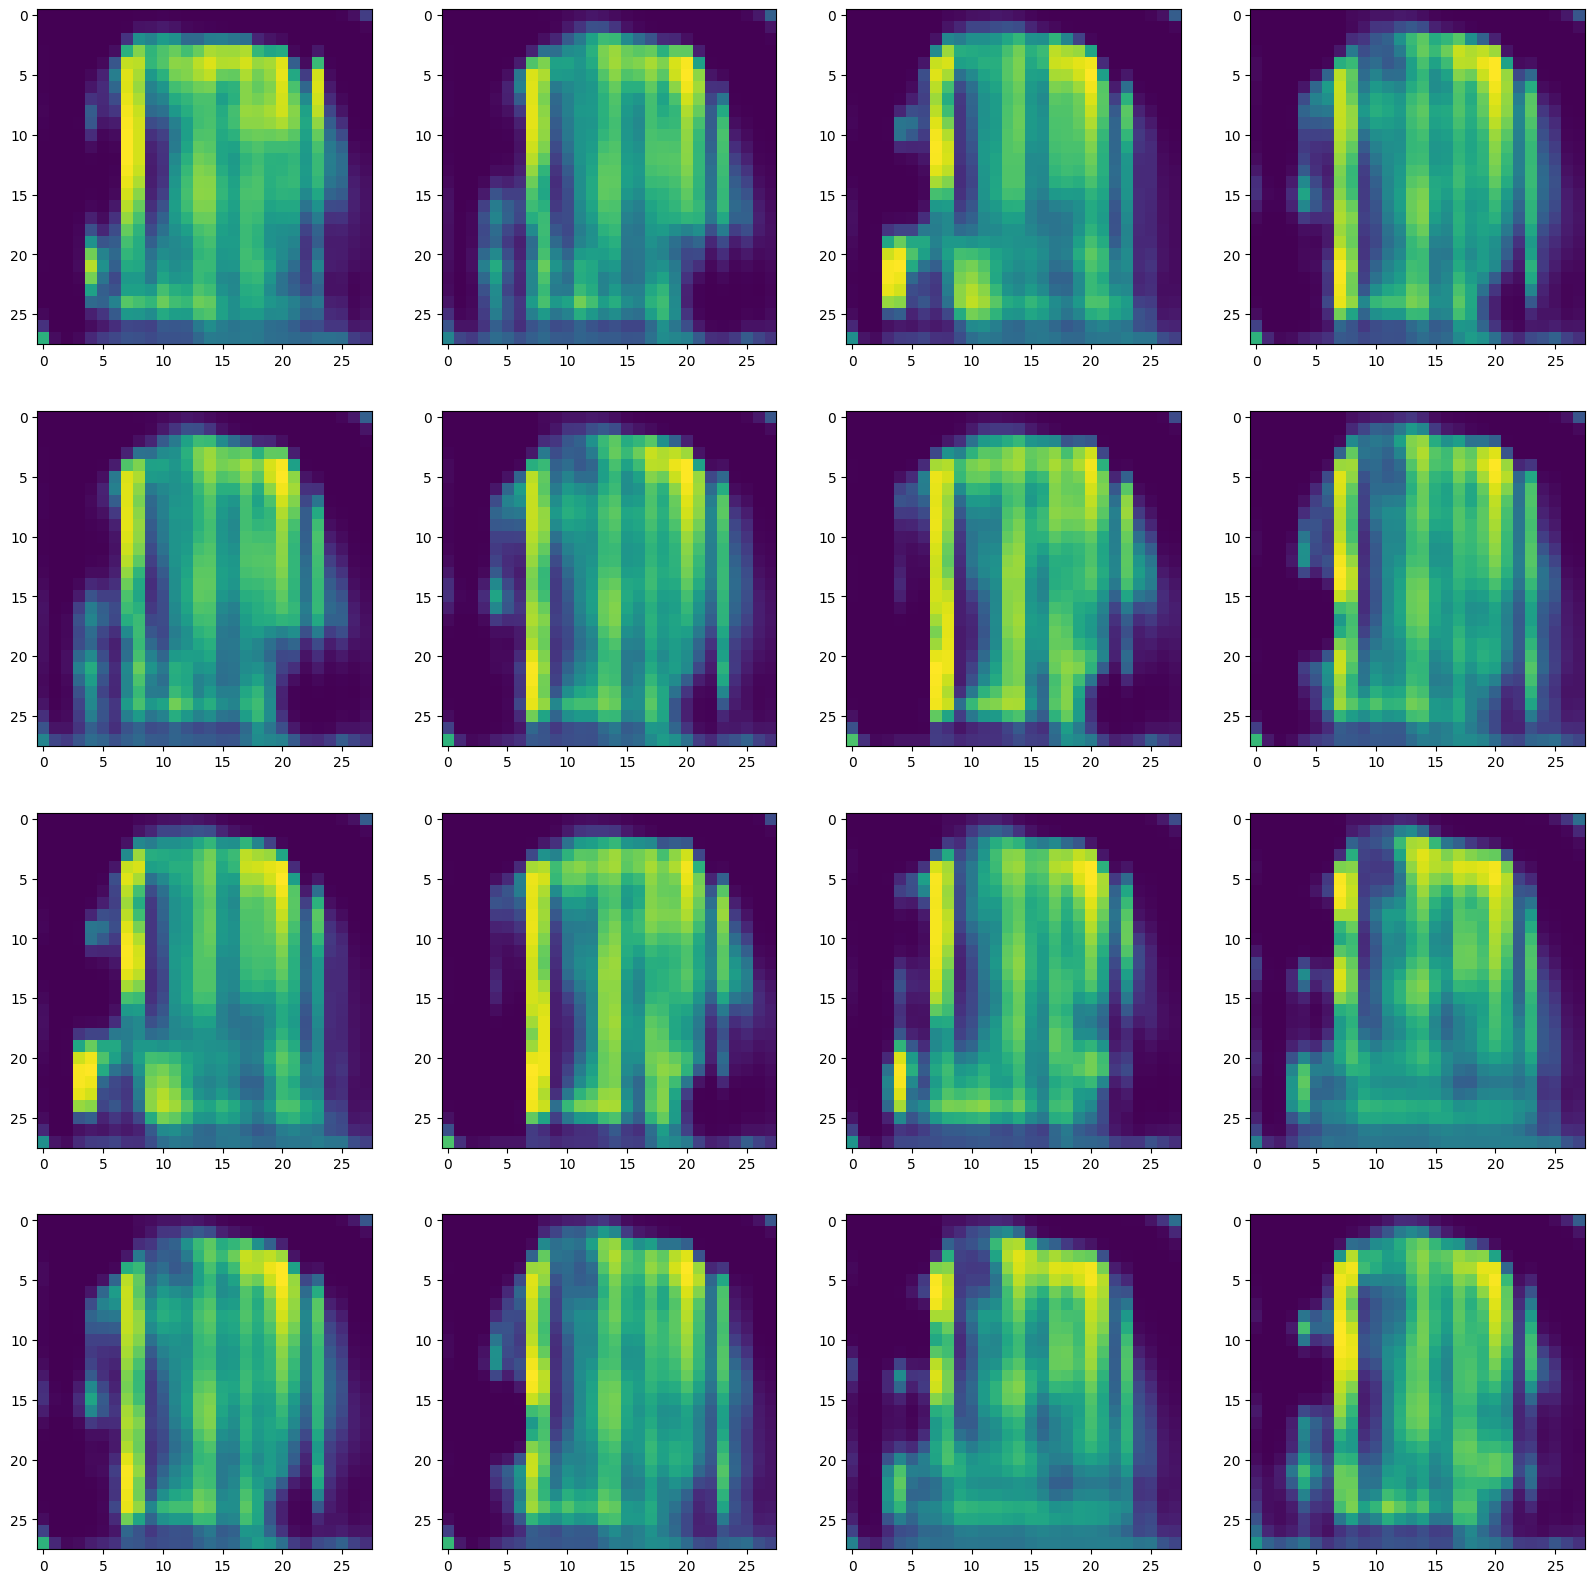

In [35]:
fig , ax = plt.subplots(ncols = 4 , nrows = 4 ,figsize = (20,20))

for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1) * (c+1) - 1])

In [36]:
# Saving the model
generator.save('generator.h5')
discriminator.save('discriminator.h5')